# Text Loading 

In [86]:
with open('1661-0.txt',"r", encoding='utf8') as f:
    text= f.readlines()

In [87]:
type(text)

list

# Text Preprocessing 


In [88]:
# remove header and footer
text=text[63:-374]



In [89]:
import re 
# \n and _removed 
def removed(line):
    return re.sub("[_|0-9]","",line)

In [90]:
#join by space
text=" ".join([removed(line) for line in text])
text[1000:2000]

' a strong emotion in a nature such as his. And\n yet there was but one woman to him, and that woman was the late Irene\n Adler, of dubious and questionable memory.\n \n I had seen little of Holmes lately. My marriage had drifted us away\n from each other. My own complete happiness, and the home-centred\n interests which rise up around the man who first finds himself master\n of his own establishment, were sufficient to absorb all my attention,\n while Holmes, who loathed every form of society with his whole Bohemian\n soul, remained in our lodgings in Baker Street, buried among his old\n books, and alternating from week to week between cocaine and ambition,\n the drowsiness of the drug, and the fierce energy of his own keen\n nature. He was still, as ever, deeply attracted by the study of crime,\n and occupied his immense faculties and extraordinary powers of\n observation in following out those clues, and clearing up those\n mysteries which had been abandoned as hopeless by the offic

# Import Libraries 

In [91]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import  Tokenizer

In [92]:
tok=Tokenizer()
tok.fit_on_texts([text])


In [93]:
tok_words=tok.word_index

In [94]:
len(tok.word_index)

8567

In [98]:

print(len(tok_words))

8567


In [19]:
for sentence in text.split('.'):
    print(sentence,'\n')
    print(tok.texts_to_sequences([sentence]))
    break

To Sherlock Holmes she is always the woman 

[[3, 135, 34, 38, 15, 225, 1, 216]]


In [20]:
# converting the whole sentences into numbers based on word_to_texts
input_sequences=[  ]
for sentence in text.split('.'):
   
    tokenized_sentence=tok.texts_to_sequences([sentence])[0]
    for i in range(1,len(tokenized_sentence)):
        n_grams=tokenized_sentence[:i+1]
        input_sequences.append(n_grams)

    

In [21]:
max_length=max([len(x) for x in input_sequences])

In [22]:
max_length

102

# Creating dataset of input and output

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_seq=pad_sequences(input_sequences,maxlen=max_length,padding='pre') # adding zero pre of every text 

In [112]:
padded_input_seq

array([[   0,    0,    0, ...,    0,    3,  135],
       [   0,    0,    0, ...,    3,  135,   34],
       [   0,    0,    0, ...,  135,   34,   38],
       ...,
       [   0,    0,    0, ...,   60,  304,   19],
       [   0,    0,    0, ...,  304,   19,  545],
       [   0,    0,    0, ...,   19,  545, 1184]])

In [115]:
X=padded_input_seq[:,:-1] # skipping the last number that is next word->output


In [116]:
X

array([[  0,   0,   0, ...,   0,   0,   3],
       [  0,   0,   0, ...,   0,   3, 135],
       [  0,   0,   0, ...,   3, 135,  34],
       ...,
       [  0,   0,   0, ...,  38,  60, 304],
       [  0,   0,   0, ...,  60, 304,  19],
       [  0,   0,   0, ..., 304,  19, 545]])

In [117]:
y=padded_input_seq[:,-1]

In [118]:
X.shape

(101596, 101)

In [119]:
y.shape

(101596,)

In [121]:
# one hot encoding 
from tensorflow.keras.utils import to_categorical

In [123]:
y=to_categorical(y,num_classes=8568)

In [124]:
y.shape

(101596, 8568)

# Model Architecture Building 

In [125]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Embedding,LSTM , Dense


In [146]:
model=Sequential()
model.add(Embedding(8568,500,input_length=max_length-1))
model.add(LSTM(1000))
model.add(Dense(8568,activation="softmax"))


In [147]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 101, 500)          4284000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              6004000   
                                                                 
 dense_3 (Dense)             (None, 8568)              8576568   
                                                                 
Total params: 18,864,568
Trainable params: 18,864,568
Non-trainable params: 0
_________________________________________________________________


In [148]:
 model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [151]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping( monitor='loss',
                       min_delta=0.0001, 
                       patience=5 ,
                       verbose=0,
                       mode='auto', 
                       baseline=None ,
                       restore_best_weights=False
)

In [153]:
history=model.fit(X,y,epochs=5,callbacks=callback)  # first trained for 20 epochs  then 5 epochs and then now 5 epochs due to very small  change in accuracy or loss function 

Epoch 1/5
3175/3175 [==============================] - 11106s 3s/step - loss: 0.6737 - accuracy: 0.8360
Epoch 2/5
3175/3175 [==============================] - 11977s 4s/step - loss: 0.6455 - accuracy: 0.8424
Epoch 3/5
3175/3175 [==============================] - 44651s 14s/step - loss: 0.6545 - accuracy: 0.8380
Epoch 4/5
3175/3175 [==============================] - 10604s 3s/step - loss: 0.6812 - accuracy: 0.8280
Epoch 5/5
3175/3175 [==============================] - 10689s 3s/step - loss: 0.7012 - accuracy: 0.8196


In [209]:
import matplotlib.pyplot as plt 
import pandas as pd


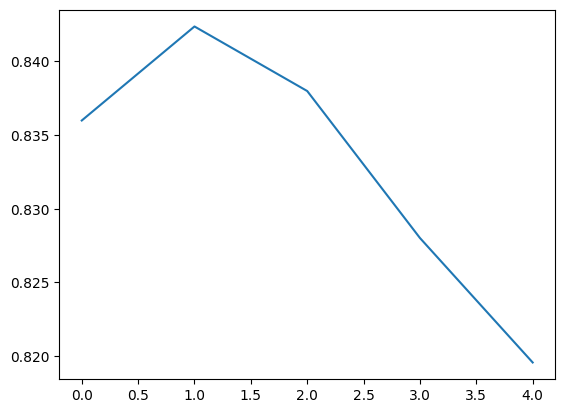

In [244]:
plt.plot(history.history['accuracy'])

In [243]:
text = ""
# tokenize 
token_text=tok.texts_to_sequences([text])[0]
# padding 
padded_token_text=pad_sequences([token_text],maxlen=max_length-1,padding='pre')
# predict 
top_indices = np.argsort(model.predict(padded_token_text)[0])[-3:][::-1]
top_indices.sort()
i=0
for word,index in tok.word_index.items():
    if index==top_indices[i]:
        print(word)
        i+=1

1/1 [==============================] - 0s 223ms/step
and
that
which


IndexError: index 3 is out of bounds for axis 0 with size 3

In [218]:
sorted(model.predict(padded_token_text)[0])[:3]

1/1 [==============================] - 0s 229ms/step


[1.6244189e-20, 3.4383455e-19, 4.9869106e-19]

In [219]:
top_indices = np.argsort(model.predict(padded_token_text)[0])[-3:][::-1]


1/1 [==============================] - 0s 257ms/step


In [222]:
top_indices.sort()
top_indices

array([  1,  90, 251], dtype=int64)

In [3]:
model.save('next_word_predictor.h5')

NameError: name 'model' is not defined

In [33]:
from keras.models import load_model
model=load_model('next_word_predictor.h5')

In [125]:
import numpy as np 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import  Tokenizer

#import list for word indexes
with open("test","rb") as rp:
     tok_word=pickle.load(rp)

# tokenize 
text=""
print(text)
token_text=tok.texts_to_sequences([text])[0]
# padding 

padded_token_text=pad_sequences([token_text],maxlen=101,padding='pre')
# predict 
top_indices = np.argsort(model.predict(padded_token_text)[0])[-3:][::-1]
top_indices.sort()
i=0
predict_words=[]

for word,index in tok_word.items():
    
    if index==top_indices[i] :
        print(top_indices[i])
        predict_words.append(word)
        i+=1
        if(i==3):
           break
print(predict_words)


1/1 [==============================] - 0s 250ms/step
[16 33 11]
11
16
33
['he', 'my', 'this']


In [30]:
predict_words

[]

In [205]:
pos_indices

array([[2698, 7134, 2197, ..., 1957,   20,   60]], dtype=int64)

In [52]:
#testing 
def prediction(input_text):
    import numpy as np 
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    import tensorflow as tf
    from tensorflow.keras.preprocessing.text import  Tokenizer
    text =input_text
    # tokenize 
    if text!="":
        tok=Tokenizer()
        token_text=tok.texts_to_sequences([text])[0]
        # padding 
        padded_token_text=pad_sequences([token_text],maxlen=101,padding='pre')
        # predict 
        top_indices = np.argsort(model.predict(padded_token_text)[0])[-3:][::-1]
        top_indices.sort()
        i=0
        predict_words=[]
        for word,index in tok.word_index.items():
            if index==top_indices[i]:
                predict_words.append(word)
                i+=1
    return predict_words
    print(prediction("i am very"))

In [69]:
import numpy as np 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import  Tokenizer
text ="i am very"
with open("test","rb") as rp:
     tok_words=pickle.load(rp)
# tokenize 
if text!="":
    tok=Tokenizer()
    token_text=tok.texts_to_sequences([text])[0]
    # padding 
    padded_token_text=pad_sequences([token_text],maxlen=101,padding='pre')
    # predict 
    top_indices = np.argsort(model.predict(padded_token_text)[0])[-3:][::-1]
    top_indices.sort()
    i=0
    predict_words=[]
    for word,index in tok_words.items():
        if index==top_indices[i]:
            predict_words.append(word)
            i+=1

1/1 [==============================] - 0s 275ms/step


IndexError: index 3 is out of bounds for axis 0 with size 3

In [28]:
predict_words

[]

In [65]:
import pickle 

with open("test","wb") as fp:
    pickle.dump(tok_words,fp)

In [67]:
with open("test","rb") as rp:
     b=pickle.load(rp)

In [68]:
b

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'a': 6,
 '”': 7,
 'in': 8,
 'that': 9,
 'it': 10,
 'he': 11,
 'was': 12,
 'you': 13,
 'his': 14,
 'is': 15,
 'my': 16,
 'have': 17,
 'as': 18,
 'with': 19,
 'had': 20,
 'which': 21,
 'at': 22,
 'for': 23,
 'me': 24,
 'be': 25,
 'not': 26,
 'but': 27,
 'we': 28,
 'from': 29,
 'said': 30,
 'upon': 31,
 'there': 32,
 'this': 33,
 'holmes': 34,
 'him': 35,
 'so': 36,
 'her': 37,
 'she': 38,
 '’': 39,
 'been': 40,
 'all': 41,
 'very': 42,
 'your': 43,
 'on': 44,
 'one': 45,
 '“i': 46,
 'were': 47,
 'by': 48,
 'are': 49,
 'an': 50,
 'would': 51,
 'out': 52,
 'no': 53,
 'what': 54,
 'then': 55,
 'when': 56,
 'up': 57,
 'man': 58,
 'could': 59,
 'has': 60,
 'into': 61,
 'little': 62,
 'do': 63,
 'who': 64,
 'mr': 65,
 'will': 66,
 'some': 67,
 'if': 68,
 'down': 69,
 'see': 70,
 'now': 71,
 'should': 72,
 'our': 73,
 'or': 74,
 'may': 75,
 'am': 76,
 'us': 77,
 'over': 78,
 'they': 79,
 'more': 80,
 'think': 81,
 'room': 82,
 'know': 83,
 'sh

In [114]:
def preprocess(input_text):
    import numpy as np 
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    import tensorflow as tf
    import pickle
    from tensorflow.keras.preprocessing.text import  Tokenizer
    #import list for word indexes
    with open("test","rb") as rp:
        tok_word=pickle.load(rp)
    # tokenize 
    print(tok_word)
    text=input_text
    print(text)
    tok=Tokenizer()
    token_text=tok.texts_to_sequences([text])[0]
    # padding 
    padded_token_text=pad_sequences([token_text],maxlen=101,padding='pre')
    # predict 
    top_indices = np.argsort(model.predict(padded_token_text)[0])[-3:][::-1]

    top_indices.sort()
    i=0
    predict_words=[]
    print(padded_token_text)
    for word,index in tok_word.items():
        
        if index==top_indices[i] :
            print(word)
            predict_words.append(word)
            i+=1
            if(i==3):
                break
    return predict_words

In [115]:
preprocess("i am very")

{'the': 1, 'and': 2, 'to': 3, 'of': 4, 'i': 5, 'a': 6, '”': 7, 'in': 8, 'that': 9, 'it': 10, 'he': 11, 'was': 12, 'you': 13, 'his': 14, 'is': 15, 'my': 16, 'have': 17, 'as': 18, 'with': 19, 'had': 20, 'which': 21, 'at': 22, 'for': 23, 'me': 24, 'be': 25, 'not': 26, 'but': 27, 'we': 28, 'from': 29, 'said': 30, 'upon': 31, 'there': 32, 'this': 33, 'holmes': 34, 'him': 35, 'so': 36, 'her': 37, 'she': 38, '’': 39, 'been': 40, 'all': 41, 'very': 42, 'your': 43, 'on': 44, 'one': 45, '“i': 46, 'were': 47, 'by': 48, 'are': 49, 'an': 50, 'would': 51, 'out': 52, 'no': 53, 'what': 54, 'then': 55, 'when': 56, 'up': 57, 'man': 58, 'could': 59, 'has': 60, 'into': 61, 'little': 62, 'do': 63, 'who': 64, 'mr': 65, 'will': 66, 'some': 67, 'if': 68, 'down': 69, 'see': 70, 'now': 71, 'should': 72, 'our': 73, 'or': 74, 'may': 75, 'am': 76, 'us': 77, 'over': 78, 'they': 79, 'more': 80, 'think': 81, 'room': 82, 'know': 83, 'shall': 84, 'can': 85, 'about': 86, 'before': 87, 'must': 88, 'than': 89, 'only': 90,

['he', 'my', 'this']